In [2]:
#| label: Import-Modules
import numpy as np
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from matplotlib.dates import DateFormatter
from sklearn.ensemble import IsolationForest

In [3]:
#| label: Import-Data.fillna({"IVVAL01":"Valid"})
kgriv12 = pyreadr.read_r("//oneabbott.com/dept/ADC/Technical_OPS/Clinical_Affairs/Clinical Study Files/Apollo/ADC-US-RES-23234_IDE Pump Suspension Study/Statistics/Programs/Datasets/AL/kgriv12.rds")
# Transform to Dataframe and fill IVVAL01 with valid
kgriv12 = kgriv12[None].set_index("Ketone Date Time")
kgriv12 = kgriv12[(kgriv12["IVVAL01"] == "Valid") | (kgriv12["IVVAL01"].isna())]
kg_90004 = kgriv12[kgriv12["Subject"] == "90004"]

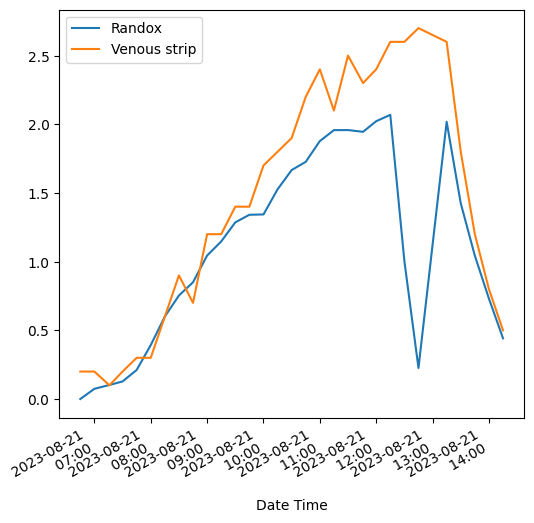

In [4]:
#| label: Visualize
fig, ax = plt.subplots(figsize=(6, 6))
kg_90004.groupby("Ref Type")["KRSEQ01"].plot(legend = True)
plt.xlabel("Date Time")
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n %H:%M"))
plt.show()

In [5]:
#| label: Preprocessing
randox = kg_90004[kg_90004["Ref Type"] == "Randox"]["KRSEQ01"]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(randox.values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)

In [16]:
#| label: Model
outliers_fraction = float(.1)
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 

IsolationForest(contamination=0.1)

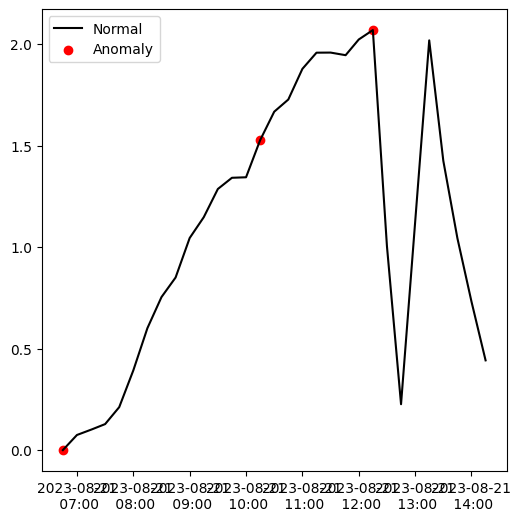

In [15]:
anomaly_data = pd.concat([randox, pd.DataFrame(model.predict(data),columns = ["Anomaly"], index = randox.index)],axis = 1)
fig, ax = plt.subplots(figsize=(6,6))

a = anomaly_data.loc[anomaly_data["Anomaly"] == -1, ["KRSEQ01"]]

ax.plot(anomaly_data.index, anomaly_data["KRSEQ01"], color='black', label = 'Normal')
ax.scatter(a.index,a["KRSEQ01"], color='red', label = 'Anomaly')
plt.legend()
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n %H:%M"))
plt.show()